<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Read the data
df = pd.read_csv('data/foodhub_order.csv')

# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Number of (rows, columns) present in the data
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Find count of missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Descriptive Stats for food preparation time
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Find number of orders that are not rated
orders_not_rated = df[df['rating'] == 'Not given']['order_id'].count()

# Display results
print(f'Total orders not rated: {orders_not_rated}')

Total orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
plt.style.use("ggplot")

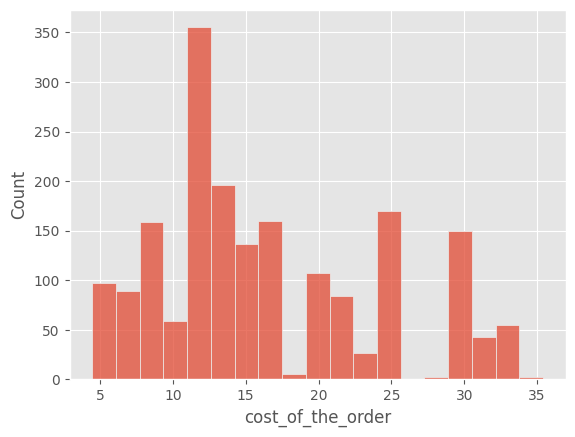

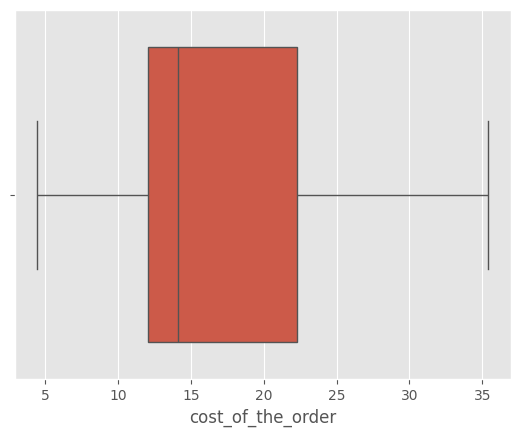

In [10]:
# Historgram of Cost of The Order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations: Most preferred cost of orders is between $11 and $12. The median cost of order is $14.

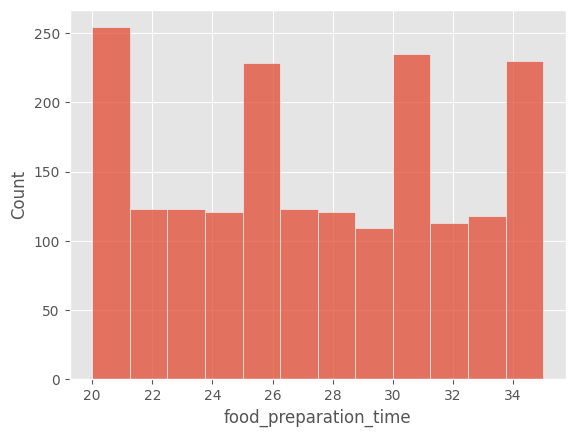

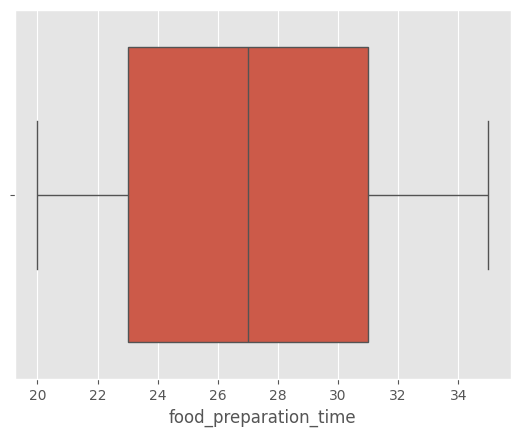

In [11]:
# Historgram of Food Preparation Time
sns.histplot(data=df,x='food_preparation_time')
plt.show()

sns.boxplot(data=df,x='food_preparation_time')
plt.show()


#### Observations:

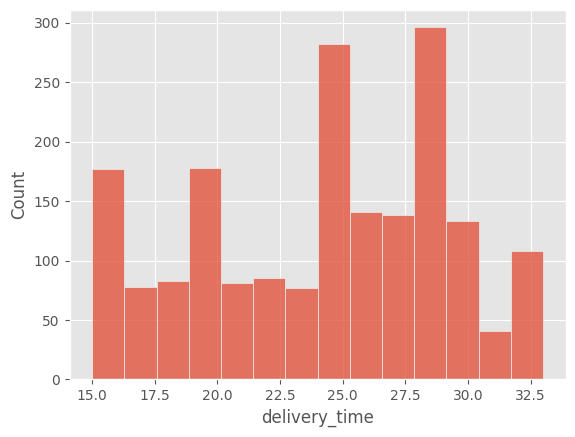

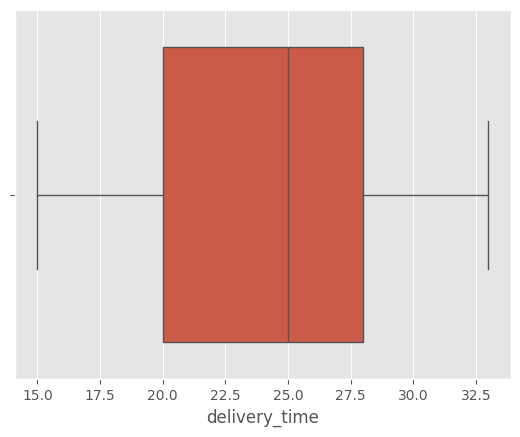

In [12]:
# Historgram of Delivery Time
sns.histplot(data=df,x='delivery_time')
plt.show()

sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:

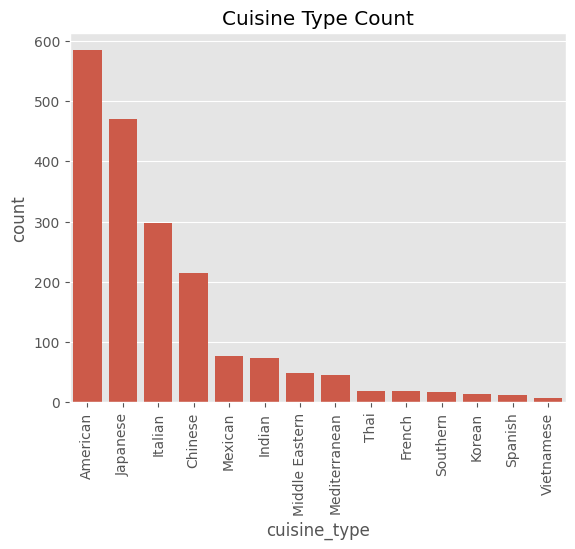

In [13]:
# Countplot of Cuisine Type
sns.countplot(data=df,x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cuisine Type Count');

#### Observations:

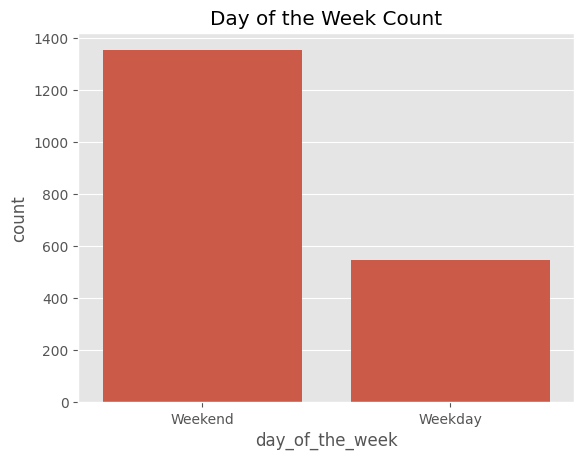

In [14]:
# Countplot of Day of the Week
sns.countplot(data=df,x='day_of_the_week')
plt.title('Day of the Week Count');

#### Observations:

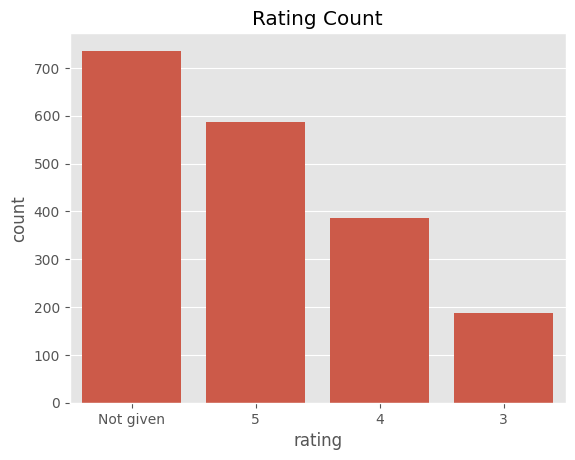

In [15]:
# Countplot of Rating
sns.countplot(data=df,x='rating', order=df['rating'].value_counts().index)
plt.title('Rating Count');


#### Observations:

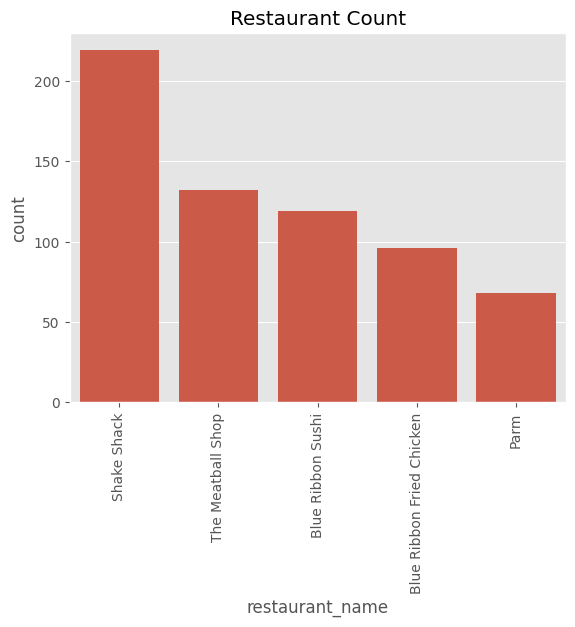

In [16]:
# Countplot of Restaurant
sns.countplot(data=df,x='restaurant_name', order=df['restaurant_name'].value_counts().head().index)
plt.title('Restaurant Count')
plt.xticks(rotation=90);

#### Observations:

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# Top 5 Restaurant per # of Orders
top_restaurant = df['restaurant_name'].value_counts()

# Display results
top_restaurant.head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
# Most Popular Cuisine on Weekends
top_weekend_cuisines = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

# Display results
top_weekend_cuisines.head()

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Percentage of Orders Costing More Than 20 Dollars
all_orders = len(df['order_id'])

# Count number of Orders costing more than 20.00
orders_over_twenty = df[df['cost_of_the_order'] >= 20.00]['order_id'].count()

# Convert Orders over 20.00 into percentage
percent_orders_over_twenty = (orders_over_twenty / all_orders) * 100

print(f'Percentage of orders costing more than 20 dollars: {percent_orders_over_twenty:.2f}%')


Percentage of orders costing more than 20 dollars: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
# Average of Order Delivery Time
mean_order_delivery = df['delivery_time'].mean()

print(f'Mean of order delivery time: {mean_order_delivery:.2f} mins')

Mean of order delivery time: 24.16 mins


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Find top 5 most frequent customers and grant 20% discount vouchers
top_five_cust = df['customer_id'].value_counts().head()

print("The Top 5 Most Frquent Customers are: ")

# Loop and print: Iterates through the top_five_cust series using a for loop
for customer, count in top_five_cust.items():
    print(f"Customer ID: {customer}, Count: {count}")

The Top 5 Most Frquent Customers are: 
Customer ID: 52832, Count: 13
Customer ID: 47440, Count: 10
Customer ID: 83287, Count: 9
Customer ID: 250494, Count: 8
Customer ID: 259341, Count: 7


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [22]:
# Clean Ratings and Replace Non-Numeric Rating to NaN
new_df = pd.DataFrame(df)

# Replace value 'Not given' with NaN and Create new dataframe
new_df = new_df.replace('Not given', np.nan)

# Convert 'rating' column to numeric (handling errors)
new_df['rating'] = pd.to_numeric(new_df['rating'], errors='coerce')

# Display information about the DataFrame
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:

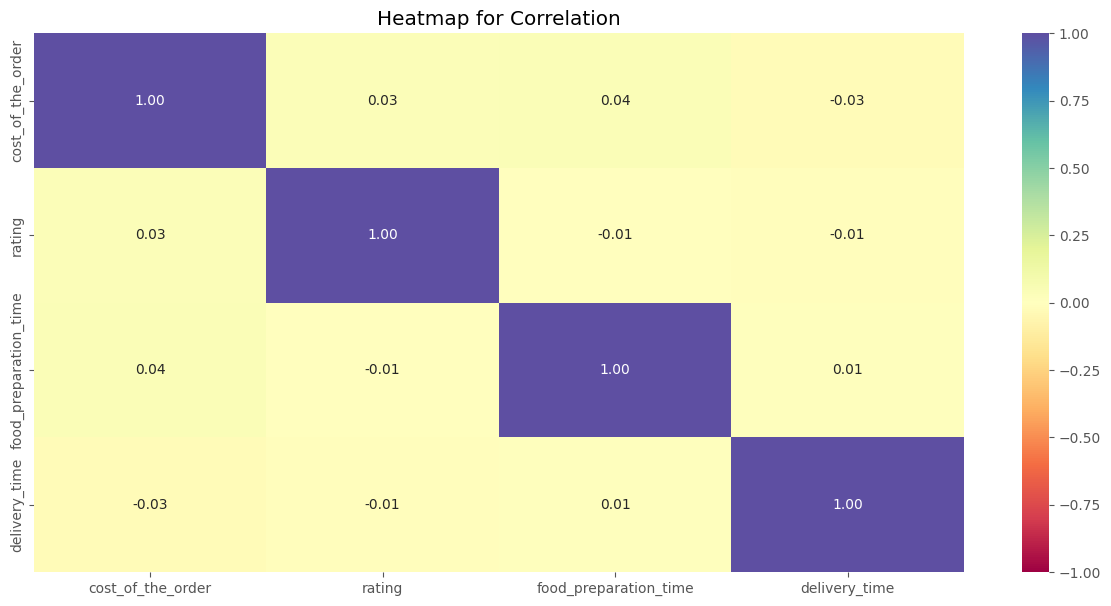

In [23]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order','rating','food_preparation_time','delivery_time']

corr = new_df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Heatmap for Correlation')
plt.show()

#### Observations:

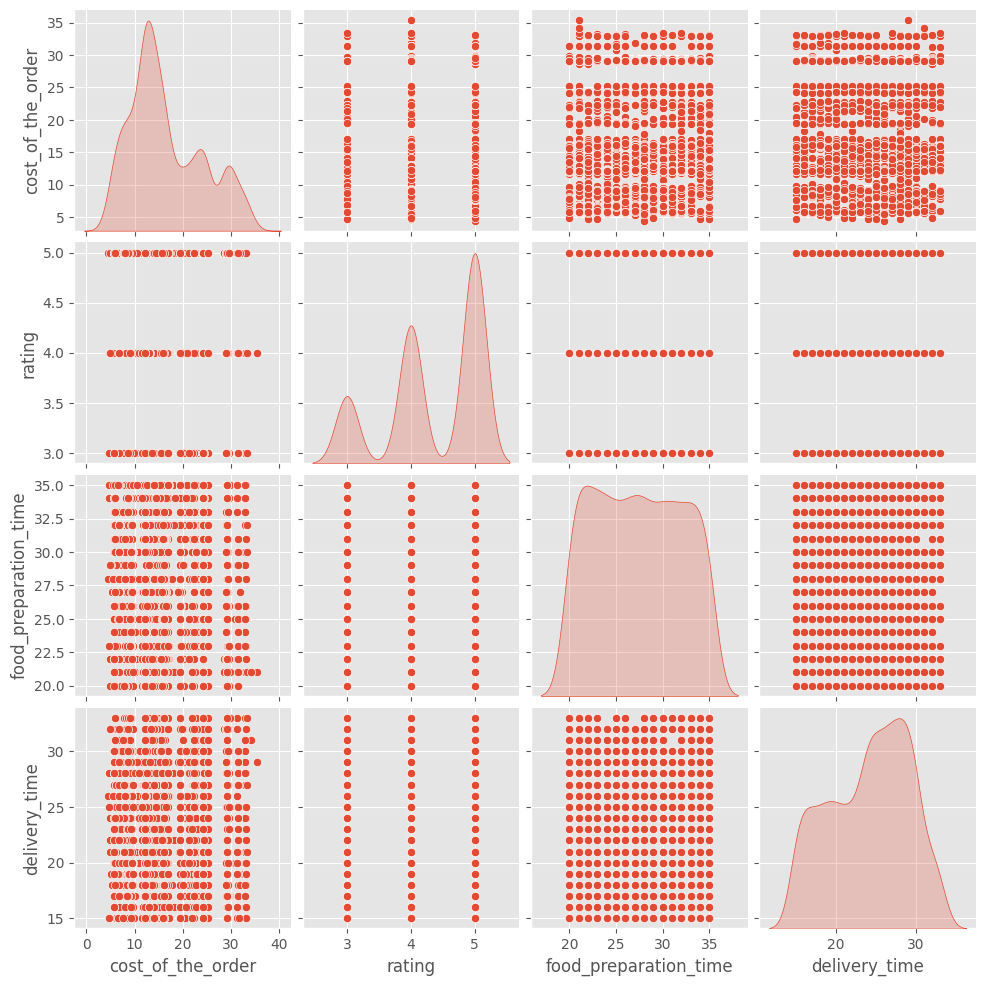

In [24]:
# Show pair plot for all numeric columns
sns.pairplot(data=new_df[num_var], diag_kind="kde")
plt.show()

#### Observations:

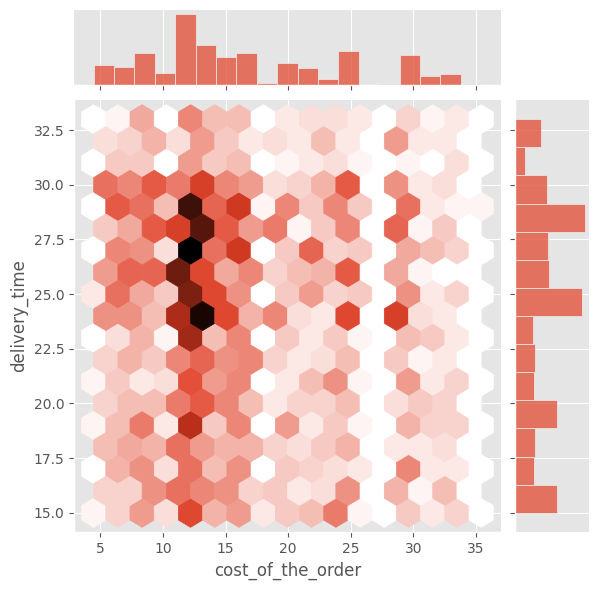

In [25]:
#plt.figure(figsize = (15,7))
#delivery time
sns.jointplot(data =df, x ='cost_of_the_order', y ='delivery_time', kind ='hex')
plt.show();

#### Observations:

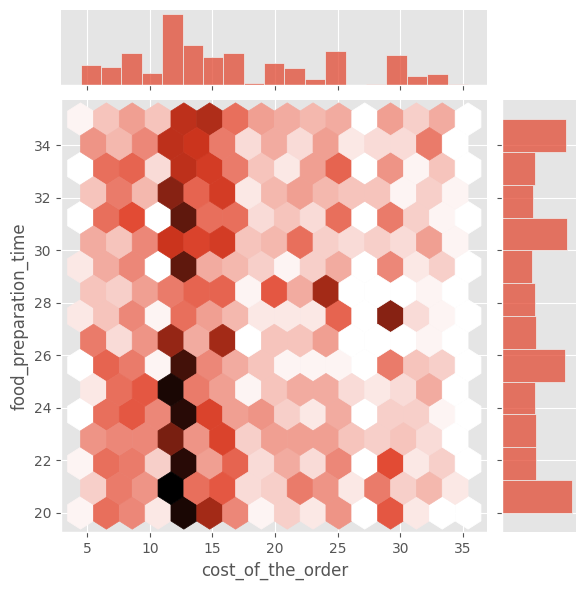

In [26]:
#delivery time
sns.jointplot(data =df, x ='cost_of_the_order', y ='food_preparation_time', kind ='hex')
plt.show();

#### Observations:

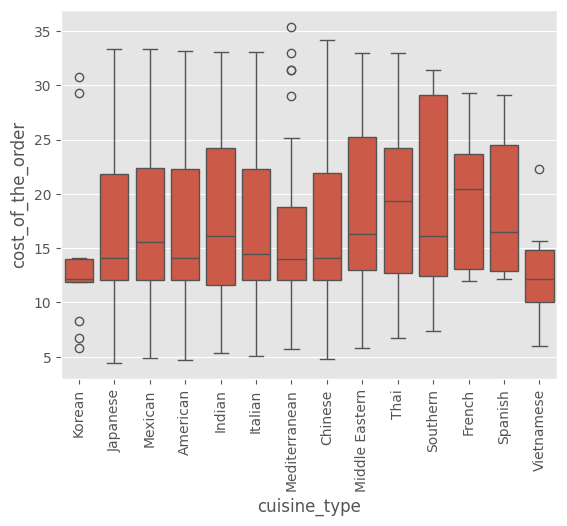

In [27]:
# Observation on Cost of orders per cuisine type
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order') 
plt.xticks(rotation=90);

#### Observations:

In [28]:
# Add 'food_preparation_time' and 'delivery_time' and store the result in a new DataFrame
new_df['total_order_time'] = new_df['food_preparation_time'] + new_df['delivery_time']

# Display DataFrame
new_df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_order_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,54


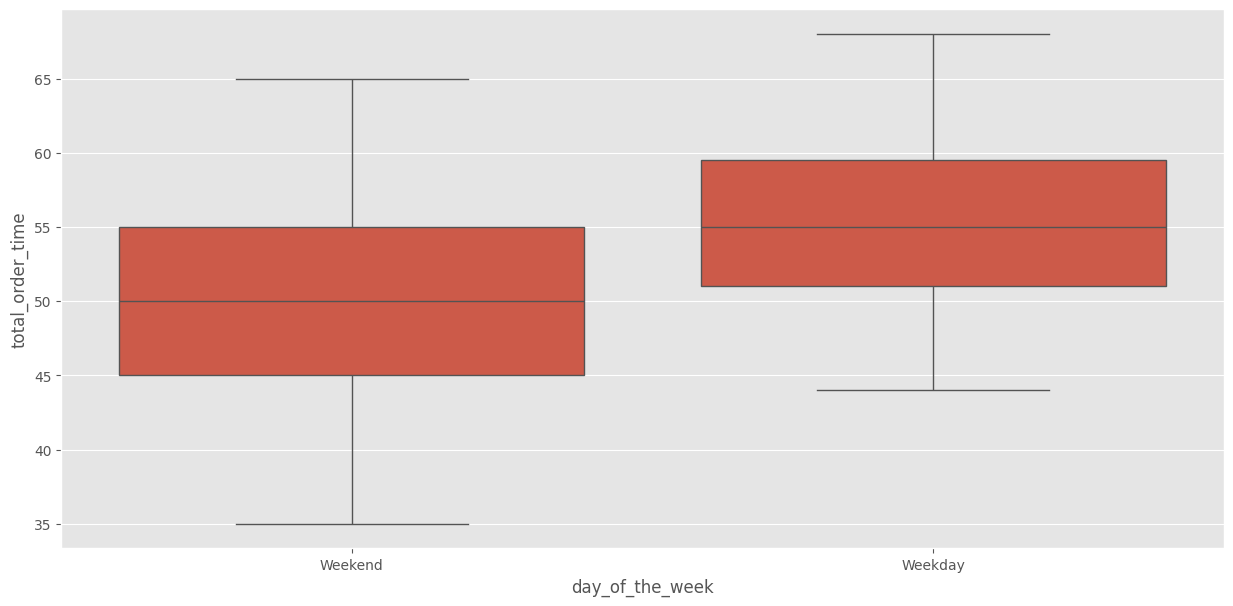

In [29]:
# Boxplot comparing total order times (combining food prep & delivery time) of the orders placed on weekends vs weekdays
plt.figure(figsize=(15,7))           
sns.boxplot(x=new_df['day_of_the_week'], y=new_df['total_order_time'])
plt.ylabel('total_order_time')
plt.xlabel('day_of_the_week')
plt.show()

#### Observations:

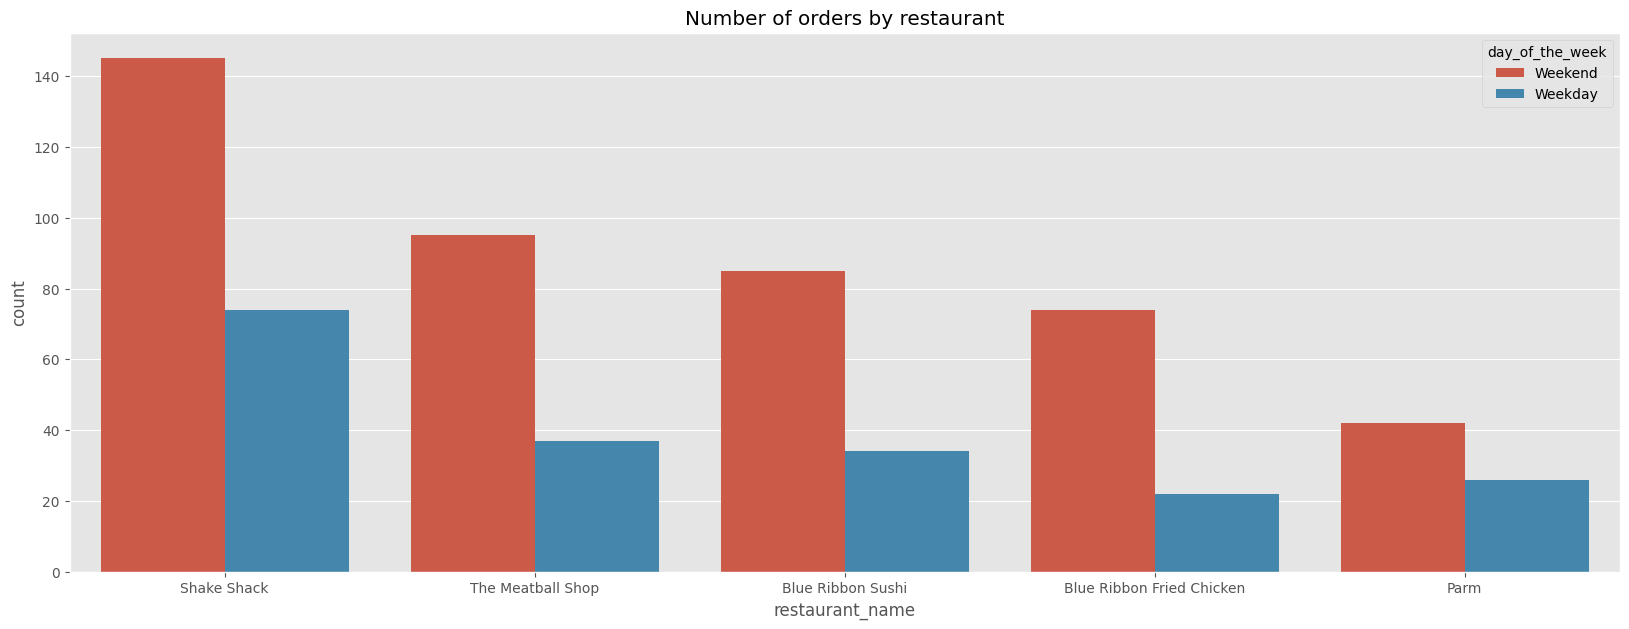

In [30]:
plt.figure(figsize =(20,7))
sns.countplot(data =df, x ='restaurant_name', order =df['restaurant_name'].value_counts().head().index, hue ='day_of_the_week');
plt.title('Number of orders by restaurant')
plt.show()

#### Observations:

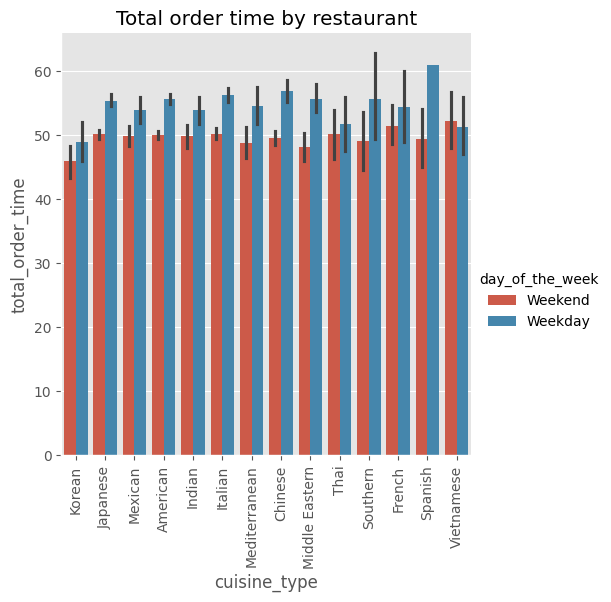

In [31]:
# Catplot comparing total order times of orders placed on weekends vs weekdays
sns.catplot(x='cuisine_type', y='total_order_time', data=new_df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.title('Total order time by restaurant')
plt.show()

#### Observations:

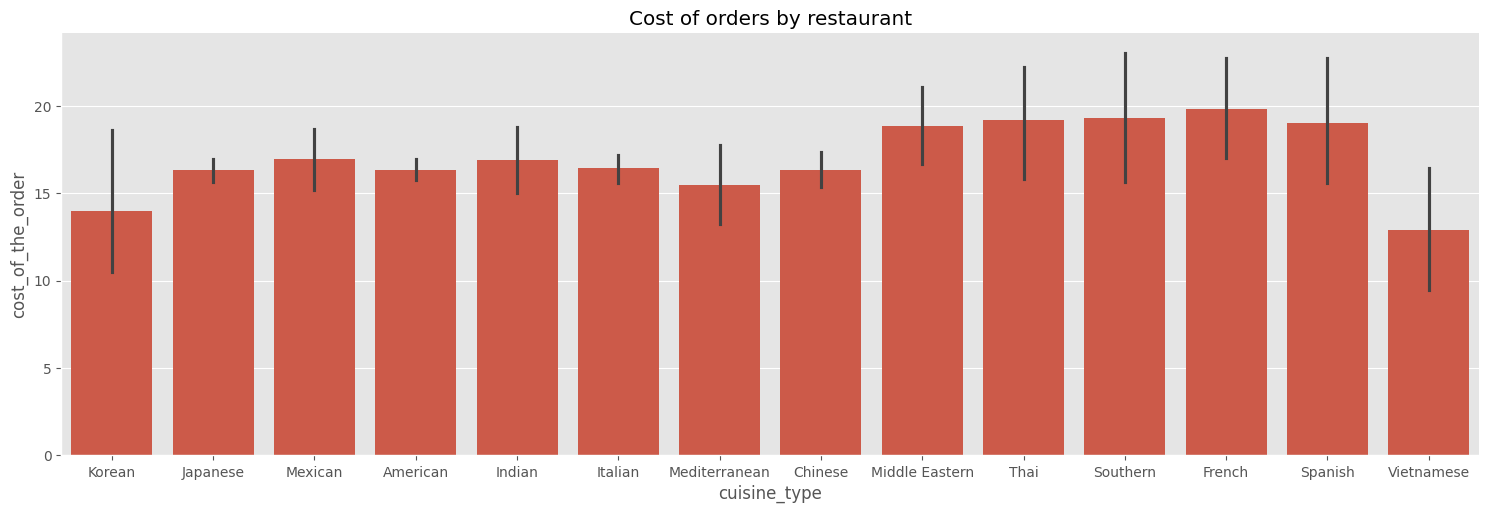

In [32]:
sns.catplot( data =df, y ='cost_of_the_order', x ='cuisine_type', estimator ='mean', kind ='bar', height =5, aspect =3)
plt.title('Cost of orders by restaurant')
plt.show()

#### Observations:

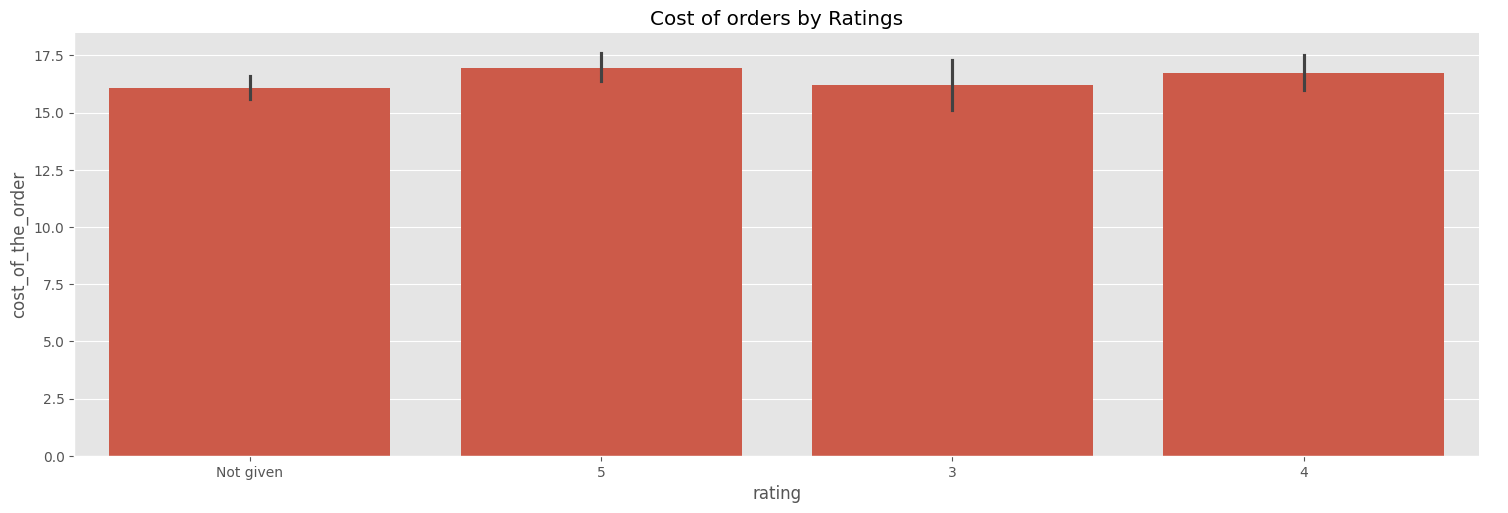

In [33]:
sns.catplot( data =df, y ='cost_of_the_order', x ='rating', estimator ='mean', kind ='bar', height =5, aspect =3)
plt.title('Cost of orders by Ratings')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the identifies restaurants with high average ratings (above 4) and a sufficient number of ratings (more than 50). It then sorts these top-rated restaurants in descending order based on their average rating Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

#### Observations:

In [34]:
# Identify all the different rating values (unique) in the 'rating' column.
df['rating'].unique()

#Clean the data by replacing a specific string ("Not given") with missing value representation (NaN)
df_nan = df.replace(to_replace="Not given", value =np.NaN)

# Converting the column to a numerical data type (float) for better analysis
df_nan['rating'] = df_nan['rating'].astype(dtype ='float')

# Calculate the average rating per restaurant
ratings_t =df_nan.groupby(['restaurant_name'])[['rating']].mean().reset_index()

# Calculate the total ratings number per restaurant
ratings_c = df_nan.groupby(['restaurant_name'])[['rating']].count().reset_index()

# Merge and combine
final_df = pd.merge(ratings_t, ratings_c, on='restaurant_name', how='inner')

# renames the columns 'rating_x' to 'avg_rating' and 'rating_y' to 'count_rating' directly in the final_df DataFrame
final_df.rename(columns = {'rating_x':'avg_rating', 'rating_y':'count_rating'}, inplace = True)

# identifies restaurants with high average ratings (above 4) and a sufficient number of ratings (more than 50). It then sorts these top-rated restaurants in descending order based on their average rating
top_rated = final_df[(final_df['avg_rating']>4) & (final_df['count_rating']>50)].sort_values(by ='avg_rating', ascending = False)

# Display results
print('Identifies restaurants with high average ratings (above 4) and a sufficient number of ratings (more than 50).')
top_rated

Identifies restaurants with high average ratings (above 4) and a sufficient number of ratings (more than 50).


,restaurant_name,avg_rating,count_rating
153,The Meatball Shop,4.511905,84
20,Blue Ribbon Fried Chicken,4.328125,64
136,Shake Shack,4.278195,133
21,Blue Ribbon Sushi,4.219178,73


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [35]:
# Identify orders over $20.00
orders_over_twenty = df[df['cost_of_the_order'] >= 20.00]

# Calculate the surcharge (25% of cost) for orders over $20
surcharge_one = orders_over_twenty['cost_of_the_order'] * 0.25

# Identify orders between $5.00 and $20.00 (exclusive)
orders_between_five_and_twenty = df[(df['cost_of_the_order'] >= 5.00) & (df['cost_of_the_order'] < 20.00)]

# Calculate the surcharge (15% of cost) for orders between $5 and $20
surcharge_two = orders_between_five_and_twenty['cost_of_the_order'] * 0.15

# Calculation of total surcharge
total_surcharge = surcharge_one.sum() + surcharge_two.sum()

# Print the total surcharge with clear formatting
print(f'Net revenue generated by the company across all orders: ${total_surcharge:.2f}')



Net revenue generated by the company across all orders: $6166.30


#### Observations:

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [36]:
# Calculate total number of total orders
df['total_time'] = df['food_preparation_time']+df['delivery_time']

# Calculate percentage of orders over 60 minutes
percent_of_orders_over_sixty_mins = 100 * round(len(df[df['total_time']>60])/len(df),4)

# Print informative message with formatted percentage
print(f'Percentage of orders taking more than 60 minutes to get delivered from time the order is placed: {percent_of_orders_over_sixty_mins:.2f}%')


Percentage of orders taking more than 60 minutes to get delivered from time the order is placed: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [37]:
# Calculate average delivery time on weekdays
avg_delivery_weekday = new_df[new_df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate average delivery time on weekends
avg_delivery_weekend = new_df[new_df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print informative messages with formatted average delivery times
print(f'Average delivery time on Weekdays: {avg_delivery_weekday:.2f} mins')

# Print informative messages with formatted average delivery times
print(f'Average delivery time on Weekends: {avg_delivery_weekend:.2f} mins')


Average delivery time on Weekdays: 28.34 mins
Average delivery time on Weekends: 22.47 mins


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

In [38]:
# Export Jupyter Notebook project file  into .html format
# !jupyter nbconvert --to html /content/PYF_Project_LearnerNotebook.ipynb

---